In [ ]:
# TODO: fix algorithm for simulated data

In [1]:
%matplotlib inline

from detector import detect_blobs

from mpl_toolkits.mplot3d import Axes3D

import sys

sys.path.append('./util/')
from util.Grapher import Grapher
from util.ImageGenerator import ImageGenerator
from util.ImageDrawer import ImageDrawer
from util.helper import (
    read_csv,
    txt_to_3pts,
    csv_to_3pts,
    euc_dist
)

from tifffile import imread

import matplotlib.pyplot as plt

from skimage.color import rgb2gray

import numpy as np


# Simulated Data

In [2]:
sim_stack = imread('simulated_data/blurred_147_cells.tif')
print('(z, y, x):')
print(sim_stack.shape)

(z, y, x):
(100, 1000, 1000, 3)


In [3]:
print(sim_stack[:,:,:,0])

[[[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 ..., 
 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]]


In [4]:
# gray_img_stack = rgb2gray(img_stack)
gray_stack = sim_stack[:,:,:,0]
print(gray_stack.shape)

(100, 1000, 1000)


In [5]:
print(np.any(gray_stack[0,:,:]))

False


In [6]:
blurred_147_cells_centroids = detect_blobs(gray_stack, 'simulated_data/blurred_147_cells.csv')

In [9]:
print(len(blurred_147_cells_centroids))

49


In [21]:
gray_stack = gray_stack.astype(float)

In [22]:
# Normalizing
gray_stack *= (255.0/ gray_stack.max())

In [23]:
full_sim_stack = np.zeros((100, 1000, 1000, 3))
full_sim_stack[:,:,:,0] = gray_stack
full_sim_stack[:,:,:,1] = gray_stack
full_sim_stack[:,:,:,2] = gray_stack

In [24]:
saved_centroids = np.genfromtxt('simulated_data/blurred_147_cells.csv', delimiter=',', dtype=np.dtype(int))

In [25]:
print(saved_centroids.shape)

(49, 3)


In [26]:
print(saved_centroids)

[[-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]]


In [92]:
centroids_ordered = saved_centroids[np.argsort(saved_centroids[:,0])]

In [93]:
print(centroids_ordered)

[[  2  77 818]
 [  2 240  62]
 [  2 444 140]
 [  2 839 320]
 [  3 458  49]
 [  3 929 322]
 [  4 588  99]
 [  4 858 725]
 [  4 807 576]
 [  5 768  78]
 [  5 836 961]
 [  5 884 199]
 [  6 615 435]
 [  6 455 935]
 [  6  73 816]
 [  6 813 860]
 [  6 388 236]
 [  6 334 915]
 [  6 751 349]
 [  7 906 113]
 [ 10 156 664]
 [ 10 338 624]
 [ 12 332 919]
 [ 16 612 970]
 [ 16  63 188]
 [ 16 255 226]
 [ 17 264  14]
 [ 17 187 172]
 [ 26 414 647]
 [ 27 234 595]
 [ 27 337 474]
 [ 27 553 217]
 [ 28 406 402]
 [ 29 602 777]
 [ 32 423 134]
 [ 32 766 494]
 [ 33 311 616]
 [ 33 500 468]
 [ 33 688  76]
 [ 33 502 356]
 [ 34 394 671]
 [ 34 408 375]
 [ 34 699 495]
 [ 34 335 478]
 [ 37 386 680]
 [ 37 618 619]
 [ 41 424 140]
 [ 42 839  15]
 [ 47 669 675]
 [ 48 547 388]
 [ 48 528 876]
 [ 48 329 367]
 [ 48 493 729]
 [ 50 659 148]
 [ 52 323 361]
 [ 53 861 570]
 [ 53 598 833]
 [ 58 803 484]
 [ 59 319 368]
 [ 59 402 601]
 [ 60 554 330]
 [ 61 806 659]
 [ 61 531 182]
 [ 61 654 166]
 [ 62 512 691]
 [ 63 442  21]
 [ 68 554 

In [89]:
zs = [p[0] for p in saved_centroids]
ys = [p[1] for p in saved_centroids]
xs = [p[2] for p in saved_centroids]

In [73]:
centers = np.copy(saved_centroids)

In [74]:
centers[:,[2,0]] = centers[:,[0,2]]
print(centers)

[[818  77   2]
 [ 62 240   2]
 [140 444   2]
 [ 49 458   3]
 [ 99 588   4]
 [320 839   2]
 [725 858   4]
 [322 929   3]
 [ 78 768   5]
 [576 807   4]
 [961 836   5]
 [199 884   5]
 [915 334   6]
 [236 388   6]
 [349 751   6]
 [816  73   6]
 [935 455   6]
 [435 615   6]
 [860 813   6]
 [113 906   7]
 [664 156  10]
 [624 338  10]
 [919 332  12]
 [188  63  16]
 [172 187  17]
 [226 255  16]
 [ 14 264  17]
 [970 612  16]
 [595 234  27]
 [474 337  27]
 [402 406  28]
 [647 414  26]
 [217 553  27]
 [777 602  29]
 [134 423  32]
 [ 76 688  33]
 [494 766  32]
 [356 502  33]
 [616 311  33]
 [478 335  34]
 [671 394  34]
 [375 408  34]
 [468 500  33]
 [495 699  34]
 [680 386  37]
 [619 618  37]
 [140 424  41]
 [ 15 839  42]
 [367 329  48]
 [729 493  48]
 [876 528  48]
 [388 547  48]
 [148 659  50]
 [675 669  47]
 [361 323  52]
 [570 861  53]
 [833 598  53]
 [166 654  61]
 [484 803  58]
 [368 319  59]
 [601 402  59]
 [182 531  61]
 [330 554  60]
 [691 512  62]
 [659 806  61]
 [ 21 442  63]
 [814 554 

In [77]:
# Axes3D.scatter(xs, ys, zs, zdir='z')

In [90]:
real_with_centers = ImageDrawer.draw_centers(stack, centers, (255,0,0), fname='s3617_centroids', copy=True)

('Saved tif as: ', 's3617_centroids.tif', ' at ', 's3617_centroids.tif')


# Real Data

In [2]:
real_stack = imread('s3617_tifffile.tif')

real_centroids = detect_blobs(real_stack, 's3671_centroids.csv')

In [3]:
print(real_centroids)

[[2, 77, 2], [2, 240, 2], [2, 444, 2], [3, 458, 3], [4, 588, 4], [2, 839, 2], [4, 858, 4], [3, 929, 3], [5, 768, 5], [4, 807, 4], [5, 836, 5], [5, 884, 5], [6, 334, 6], [6, 388, 6], [6, 751, 6], [6, 73, 6], [6, 455, 6], [6, 615, 6], [6, 813, 6], [7, 906, 7], [10, 156, 10], [10, 338, 10], [12, 332, 12], [16, 63, 16], [17, 187, 17], [16, 255, 16], [17, 264, 17], [16, 612, 16], [27, 234, 27], [27, 337, 27], [28, 406, 28], [26, 414, 26], [27, 553, 27], [29, 602, 29], [32, 423, 32], [33, 688, 33], [32, 766, 32], [33, 502, 33], [33, 311, 33], [34, 335, 34], [34, 394, 34], [34, 408, 34], [33, 500, 33], [34, 699, 34], [37, 386, 37], [37, 618, 37], [41, 424, 41], [42, 839, 42], [48, 329, 48], [48, 493, 48], [48, 528, 48], [48, 547, 48], [50, 659, 50], [47, 669, 47], [52, 323, 52], [53, 861, 53], [53, 598, 53], [61, 654, 61], [58, 803, 58], [59, 319, 59], [59, 402, 59], [61, 531, 61], [60, 554, 60], [62, 512, 62], [61, 806, 61], [63, 442, 63], [68, 554, 68], [76, 984, 76], [77, 318, 77], [81, 39

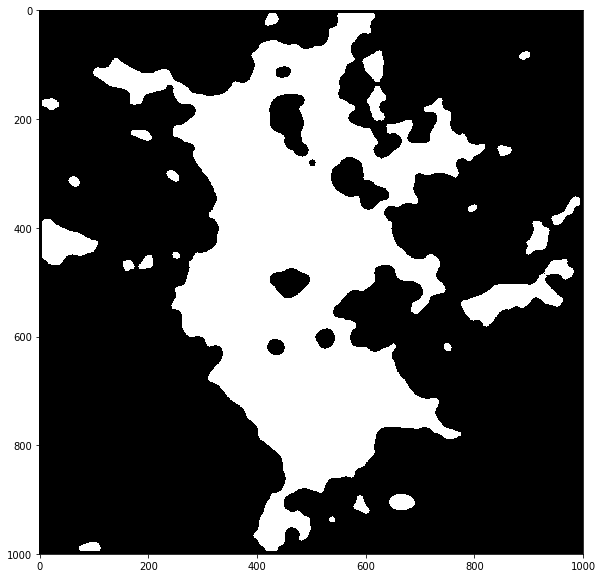

In [6]:
bin_stack = imread('bin_stack.tif')

bin_slice = bin_stack[78,:,:]
plt.figure(figsize=(10, 10))

plt.imshow(bin_slice, cmap=plt.cm.gray)

# overlaying

In [19]:
real_stack = imread('s3617_tifffile.tif')
print('(z, y, x):')
print(real_stack.shape)

(z, y, x):
(100, 1000, 1000)


In [17]:
real_stack *= (255.0/real_stack.max())

In [88]:
stack = np.zeros((100, 1000, 1000, 3))
stack[:,:,:,0] = real_stack
stack[:,:,:,1] = real_stack
stack[:,:,:,2] = real_stack

In [57]:
saved_centroids = np.genfromtxt('blob_centroids.csv', delimiter=',', dtype=np.dtype(int))

In [64]:
print(saved_centroids.shape)

(85, 3)


In [58]:
print(saved_centroids)

[[  2  77 818]
 [  2 240  62]
 [  2 444 140]
 [  3 458  49]
 [  4 588  99]
 [  2 839 320]
 [  4 858 725]
 [  3 929 322]
 [  5 768  78]
 [  4 807 576]
 [  5 836 961]
 [  5 884 199]
 [  6 334 915]
 [  6 388 236]
 [  6 751 349]
 [  6  73 816]
 [  6 455 935]
 [  6 615 435]
 [  6 813 860]
 [  7 906 113]
 [ 10 156 664]
 [ 10 338 624]
 [ 12 332 919]
 [ 16  63 188]
 [ 17 187 172]
 [ 16 255 226]
 [ 17 264  14]
 [ 16 612 970]
 [ 27 234 595]
 [ 27 337 474]
 [ 28 406 402]
 [ 26 414 647]
 [ 27 553 217]
 [ 29 602 777]
 [ 32 423 134]
 [ 33 688  76]
 [ 32 766 494]
 [ 33 502 356]
 [ 33 311 616]
 [ 34 335 478]
 [ 34 394 671]
 [ 34 408 375]
 [ 33 500 468]
 [ 34 699 495]
 [ 37 386 680]
 [ 37 618 619]
 [ 41 424 140]
 [ 42 839  15]
 [ 48 329 367]
 [ 48 493 729]
 [ 48 528 876]
 [ 48 547 388]
 [ 50 659 148]
 [ 47 669 675]
 [ 52 323 361]
 [ 53 861 570]
 [ 53 598 833]
 [ 61 654 166]
 [ 58 803 484]
 [ 59 319 368]
 [ 59 402 601]
 [ 61 531 182]
 [ 60 554 330]
 [ 62 512 691]
 [ 61 806 659]
 [ 63 442  21]
 [ 68 554 

In [92]:
centroids_ordered = saved_centroids[np.argsort(saved_centroids[:,0])]

In [93]:
print(centroids_ordered)

[[  2  77 818]
 [  2 240  62]
 [  2 444 140]
 [  2 839 320]
 [  3 458  49]
 [  3 929 322]
 [  4 588  99]
 [  4 858 725]
 [  4 807 576]
 [  5 768  78]
 [  5 836 961]
 [  5 884 199]
 [  6 615 435]
 [  6 455 935]
 [  6  73 816]
 [  6 813 860]
 [  6 388 236]
 [  6 334 915]
 [  6 751 349]
 [  7 906 113]
 [ 10 156 664]
 [ 10 338 624]
 [ 12 332 919]
 [ 16 612 970]
 [ 16  63 188]
 [ 16 255 226]
 [ 17 264  14]
 [ 17 187 172]
 [ 26 414 647]
 [ 27 234 595]
 [ 27 337 474]
 [ 27 553 217]
 [ 28 406 402]
 [ 29 602 777]
 [ 32 423 134]
 [ 32 766 494]
 [ 33 311 616]
 [ 33 500 468]
 [ 33 688  76]
 [ 33 502 356]
 [ 34 394 671]
 [ 34 408 375]
 [ 34 699 495]
 [ 34 335 478]
 [ 37 386 680]
 [ 37 618 619]
 [ 41 424 140]
 [ 42 839  15]
 [ 47 669 675]
 [ 48 547 388]
 [ 48 528 876]
 [ 48 329 367]
 [ 48 493 729]
 [ 50 659 148]
 [ 52 323 361]
 [ 53 861 570]
 [ 53 598 833]
 [ 58 803 484]
 [ 59 319 368]
 [ 59 402 601]
 [ 60 554 330]
 [ 61 806 659]
 [ 61 531 182]
 [ 61 654 166]
 [ 62 512 691]
 [ 63 442  21]
 [ 68 554 

In [89]:
zs = [p[0] for p in saved_centroids]
ys = [p[1] for p in saved_centroids]
xs = [p[2] for p in saved_centroids]

In [73]:
centers = np.copy(saved_centroids)

In [74]:
centers[:,[2,0]] = centers[:,[0,2]]
print(centers)

[[818  77   2]
 [ 62 240   2]
 [140 444   2]
 [ 49 458   3]
 [ 99 588   4]
 [320 839   2]
 [725 858   4]
 [322 929   3]
 [ 78 768   5]
 [576 807   4]
 [961 836   5]
 [199 884   5]
 [915 334   6]
 [236 388   6]
 [349 751   6]
 [816  73   6]
 [935 455   6]
 [435 615   6]
 [860 813   6]
 [113 906   7]
 [664 156  10]
 [624 338  10]
 [919 332  12]
 [188  63  16]
 [172 187  17]
 [226 255  16]
 [ 14 264  17]
 [970 612  16]
 [595 234  27]
 [474 337  27]
 [402 406  28]
 [647 414  26]
 [217 553  27]
 [777 602  29]
 [134 423  32]
 [ 76 688  33]
 [494 766  32]
 [356 502  33]
 [616 311  33]
 [478 335  34]
 [671 394  34]
 [375 408  34]
 [468 500  33]
 [495 699  34]
 [680 386  37]
 [619 618  37]
 [140 424  41]
 [ 15 839  42]
 [367 329  48]
 [729 493  48]
 [876 528  48]
 [388 547  48]
 [148 659  50]
 [675 669  47]
 [361 323  52]
 [570 861  53]
 [833 598  53]
 [166 654  61]
 [484 803  58]
 [368 319  59]
 [601 402  59]
 [182 531  61]
 [330 554  60]
 [691 512  62]
 [659 806  61]
 [ 21 442  63]
 [814 554 

In [77]:
# Axes3D.scatter(xs, ys, zs, zdir='z')

In [90]:
real_with_centers = ImageDrawer.draw_centers(stack, centers, (255,0,0), fname='s3617_centroids', copy=True)

('Saved tif as: ', 's3617_centroids.tif', ' at ', 's3617_centroids.tif')


In [78]:
print(real_with_centers.shape)

(100, 1000, 1000, 3)


In [84]:
real_stack_centroids = real_with_centers[:,:,:,0]

In [83]:
max_grey_val = real_stack_centroids.max(axis=1).max(axis=1).max()
dim = real_stack_centroids.shape
cutout_rgb = np.zeros((dim[0], dim[1], dim[2], 3))
for i in range(dim[0]):
    for j in range(dim[1]):
        for k in range(dim[2]):
            normalized_rgb = int( 255 * (real_stack_centroids[i][j][k]/max_grey_val) )
            for p in range(3):
                cutout_rgb[i][j][k][p] = normalized_rgb

KeyboardInterrupt: 

In [85]:
real_stack_centroids *= (255.0/real_stack_centroids.max())

In [86]:
print(real_stack_centroids)

[[[ 2.98054475  2.89105058  2.73540856 ...,  2.92607004  2.93774319
    3.18677043]
  [ 2.6848249   2.79766537  3.01945525 ...,  3.07782101  3.16342412
    3.11284047]
  [ 2.87548638  3.10116732  3.03501946 ...,  3.07392996  3.35797665
    3.25680934]
  ..., 
  [ 3.58365759  3.31906615  3.39688716 ...,  3.13618677  3.33463035
    3.17898833]
  [ 3.24513619  3.36575875  3.24513619 ...,  3.19455253  3.25680934
    3.17509728]
  [ 3.24902724  3.47859922  3.26070039 ...,  3.37354086  3.20622568
    3.63424125]]

 [[ 2.82879377  2.87548638  2.81322957 ...,  2.85992218  3.15953307
    3.40077821]
  [ 2.6770428   2.96108949  2.75875486 ...,  2.98054475  3.15953307
    2.91050584]
  [ 2.72762646  2.83268482  2.92607004 ...,  3.21789883  3.307393
    3.26848249]
  ..., 
  [ 3.41634241  2.87159533  3.15564202 ...,  3.26459144  3.52918288
    3.14785992]
  [ 3.22178988  3.15953307  3.19066148 ...,  3.36964981  3.3229572
    3.39299611]
  [ 3.38521401  3.28015564  3.15564202 ...,  3.01945525  3.13

In [80]:
z_slice = real_stack_centroids[59,:,:]

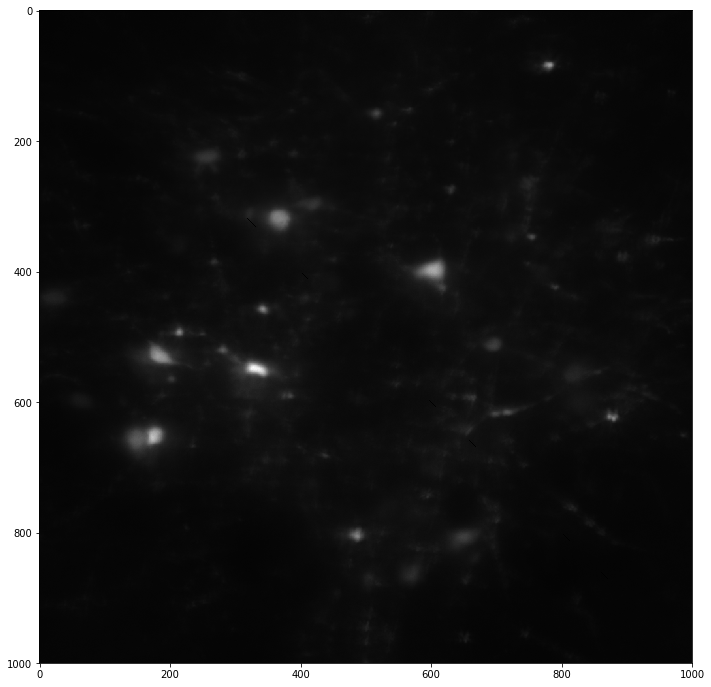

In [81]:
plt.figure(figsize=(12, 12))

# plt.imshow(z_slice, cmap='gray')
plt.imshow(z_slice, cmap=plt.cm.gray)